In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [8]:
#Finding the working directory
print(os.getcwd())
#Printing the names of files in the current working directory
print(os.listdir(os.getcwd()))
#Changing the working directory to the file that contains the capstone data (SpringBoard Cap2 Data)
os.chdir('C:\\Users\\Admin\\Downloads\\SpringBoard Cap2 Data')
#Creating the dataframe out of the csv file Sales Transaction v.4a
df=pd.read_csv('Sales Transaction v.4a.csv')
#Looking at the dataframe
print(df)

C:\Users\Admin
['.cisco', '.emulator_console_auth_token', '.gitconfig', '.gradle', '.ipynb_checkpoints', '.ipython', '.jdks', '.jupyter', '.m2', '.matplotlib', '.vscode', '3D Objects', 'AEMR.db', 'anaconda3', 'AppData', 'Application Data', 'Capstone 2 Analysis.ipynb', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'Microsoft', 'MicrosoftEdgeBackups', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{4e7c70bc-1186-11eb-9f50-f81654a54a28}.TM.blf', 'NTUSER.DAT{4e7c70bc-1186-11eb-9f50-f81654a54a28}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{4e7c70bc-1186-11eb-9f50-f81654a54a28}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'SQL Superstore Sales Project.ipynb', 'Start Menu', 'superstore_test-Copy1.csv', 'superstore_test.csv', 'Templates', 'Videos']
       TransactionNo       D

In [9]:
#Examining the data
print(df.head())
print(df.info())

  TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

   Price  Quantity  CustomerNo         Country  
0  21.47        12     17490.0  United Kingdom  
1  10.65        36     13069.0  United Kingdom  
2  11.53        12     13069.0  United Kingdom  
3  10.65        12     13069.0  United Kingdom  
4  11.94         6     13069.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object

['Doormat Fairy Cake' 'Landmark Frame Oxford Street'
 'Landmark Frame London Bridge' 'Marie Antoinette Trinket Box Silver'
 'Marie Antoinette Trinket Box Gold' 'Set 3 Wicker Oval Baskets W Lids'
 'Hall Cabinet With 3 Drawers' 'Utilty Cabinet With Hooks']
                                      Quantity      Price
ProductName                                              
Doormat Fairy Cake                    7.932615  20.135768
Hall Cabinet With 3 Drawers          15.200000  68.172000
Landmark Frame London Bridge          7.600000  20.072545
Landmark Frame Oxford Street          7.186441  20.040508
Marie Antoinette Trinket Box Gold     8.678571  21.052143
Marie Antoinette Trinket Box Silver   8.187500  23.740625
Set 3 Wicker Oval Baskets W Lids     14.030303  25.240000
Utilty Cabinet With Hooks            21.833333  32.565000


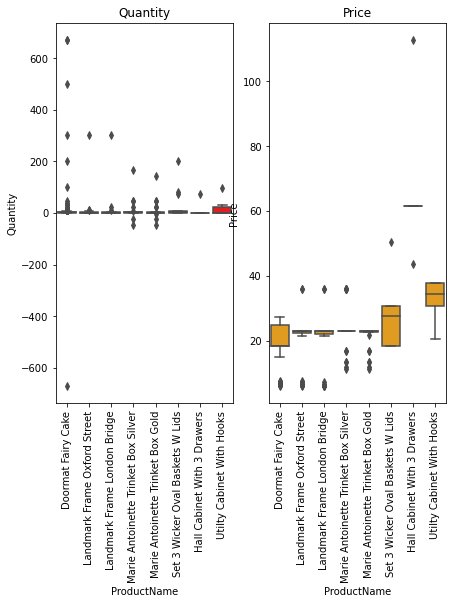

In [207]:
#Filtering df to the product names that meet criteria 1
criteria_1 = df.groupby('ProductName').filter(lambda x: x['Quantity'].mean() >= 7 and x['Price'].mean() >= 20)
#Creating variable that shows the product names of that filter
meet_cri1 = criteria_1['ProductName'].unique()
#Printing those names
print(meetcri1)
#Grouping the above data to then get the averages from
c1t_avg= criteria_1.groupby('ProductName')[['Quantity', 'Price']].mean()
print(c1t_avg)
#creating new table to make boxplots from
boxd= criteria_1[['ProductName','Quantity', 'Price']]
#Creating two different plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,7))
#Creating the first boxplot to show the quanityt of each product
sns.boxplot(data=boxd, x='ProductName', y='Quantity', color='Red', ax=axes[0])
#Naming the quantity plot
axes[0].set_title('Quantity')
#Rotation the produt name labels
axes[0].tick_params(axis='x', rotation=90)
#Box plotting the price data
sns.boxplot(data=boxd, x='ProductName', y='Price', color='Orange', ax=axes[1])
#Rotating the Product name labels
axes[1].tick_params(axis='x', rotation=90)
#Naming the price plot
axes[1].set_title('Price')
plt.show()

1    Hall Cabinet With 3 Drawers
7      Utilty Cabinet With Hooks
Name: ProductName, dtype: object
                           ProductName  Quantity
0                   Doormat Fairy Cake       4.0
1          Hall Cabinet With 3 Drawers      15.2
2         Landmark Frame London Bridge       3.0
3         Landmark Frame Oxford Street       3.0
4    Marie Antoinette Trinket Box Gold       3.6
5  Marie Antoinette Trinket Box Silver       2.0
6     Set 3 Wicker Oval Baskets W Lids       8.0
7            Utilty Cabinet With Hooks      30.0


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Doormat Fairy Cake'),
  Text(1, 0, 'Hall Cabinet With 3 Drawers'),
  Text(2, 0, 'Landmark Frame London Bridge'),
  Text(3, 0, 'Landmark Frame Oxford Street'),
  Text(4, 0, 'Marie Antoinette Trinket Box Gold'),
  Text(5, 0, 'Marie Antoinette Trinket Box Silver'),
  Text(6, 0, 'Set 3 Wicker Oval Baskets W Lids'),
  Text(7, 0, 'Utilty Cabinet With Hooks')])

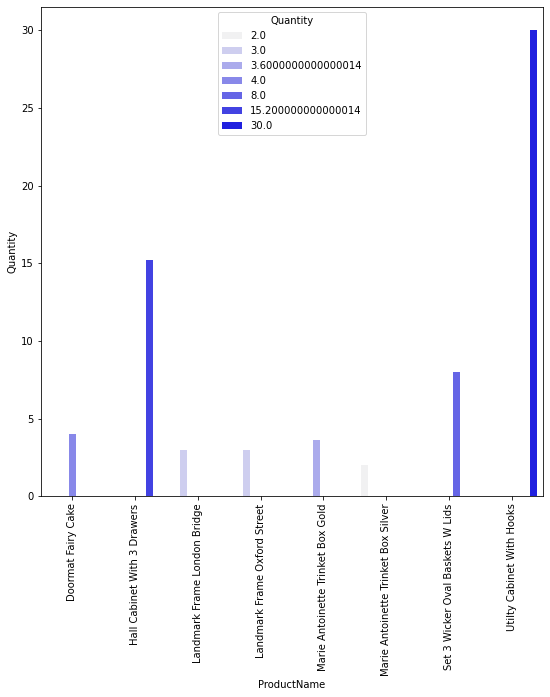

In [159]:
#Creating the group of product names that meet crietria 1 and 2 by having an 80th percentile of avg quantities above 10
criteria_2= criteria_1.groupby('ProductName')['Quantity'].quantile(0.8).reset_index()
#Returning the names of products that meet criteria 2
meet_cri2= criteria_2.loc[criteria_2['Quantity']>=10, 'ProductName']
print(meet_cri2)
print(criteria_2)
#Sizing chart
plt.figure(figsize=(9,9))
#Creating a colored bar chart
sns.barplot(data=criteria_2, x= 'ProductName', y= 'Quantity', hue= 'Quantity', color= 'Blue')
plt.xticks(rotation=90)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17012\324207714.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['January', 'March', 'May', 'July', 'September', 'November'])


ProductName
Doormat Fairy Cake                     12
Hall Cabinet With 3 Drawers             3
Landmark Frame London Bridge            3
Landmark Frame Oxford Street            3
Marie Antoinette Trinket Box Gold       6
Marie Antoinette Trinket Box Silver     6
Set 3 Wicker Oval Baskets W Lids        6
Utilty Cabinet With Hooks               2
Name: month, dtype: int64


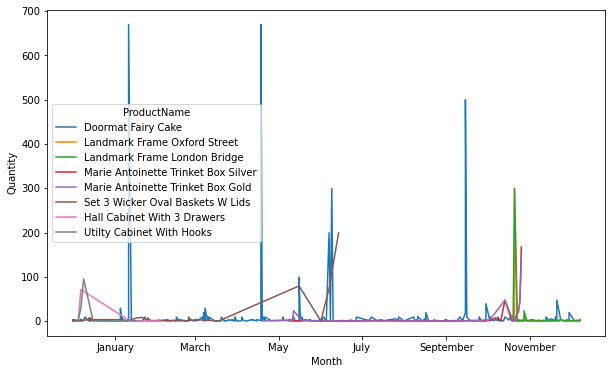

In [148]:
#Creating a column of the dates as datetime data
criteria_1['dt_date']= pd.to_datetime(criteria_1['Date'],format='%m/%d/%Y')
#Creating another column for the month that the order was sold in
criteria_1['month']=criteria_1['dt_date'].dt.month
#Creating a multiple line chart of the quantity sould across months in order to test products for criteria 3: 
#"Sells with minimal fluctuation year-round"
plt.figure(figsize=(10, 6))
#creating new data frame that excludes canceled or reutrned orders
c1=criteria_1[criteria_1['Quantity']>0]
g=sns.lineplot(data=c1, x='dt_date', y='Quantity', hue='ProductName', estimator=None)
g.set_xticklabels(['January', 'March', 'May', 'July', 'September', 'November'])
g.set_xlabel('Month')
g.set_ylabel('Quantity')
#Creating second visual for counting the number of months a product was sold in
m_count=criteria_1.groupby('ProductName')['month'].nunique()
print(m_count)

                           ProductName  Country
0                   Doormat Fairy Cake       15
1          Hall Cabinet With 3 Drawers        1
2         Landmark Frame London Bridge        4
3         Landmark Frame Oxford Street        3
4    Marie Antoinette Trinket Box Gold        5
5  Marie Antoinette Trinket Box Silver        4
6     Set 3 Wicker Oval Baskets W Lids        3
7            Utilty Cabinet With Hooks        1


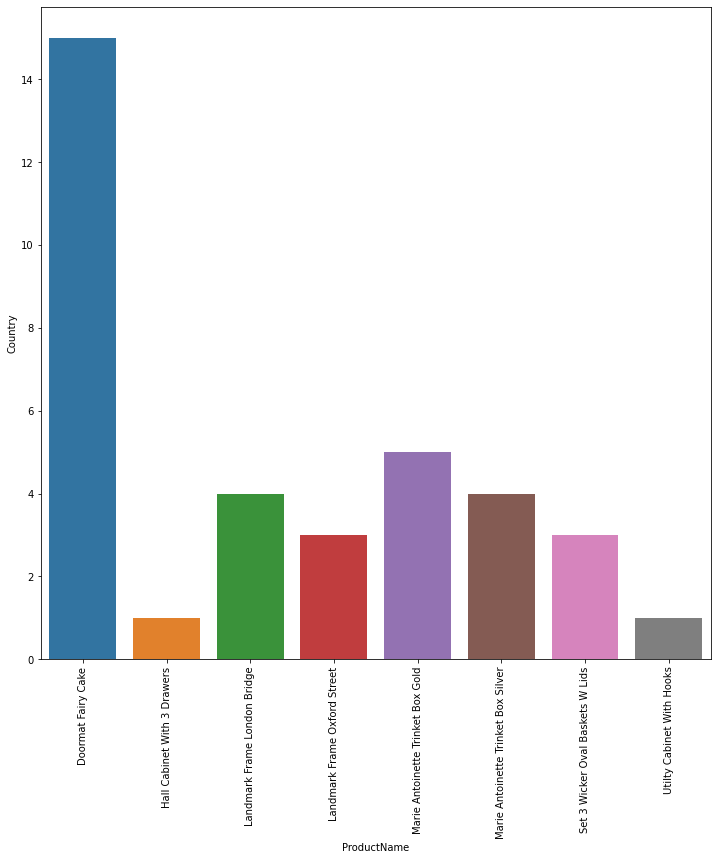

In [128]:
#Creating a chart that shows the number of months that each criteria 1 product sold in
#Starting by creating a table that shows the number of countries that each crit 1 product sold in
countries= criteria_1.groupby('ProductName')['Country'].nunique()
#Reseting the index
countries =countries.reset_index()
print(countries)
#Creating a bar plot to visualize
plt.figure(figsize=(12,12))
plt.xticks(rotation=90)
f=sns.barplot(data=countries, x='ProductName', y= 'Country')

       TransactionNo       Date ProductNo                       ProductName  \
1642          581216  12/8/2019     48185                Doormat Fairy Cake   
2185          581217  12/8/2019     23554      Landmark Frame Oxford Street   
4127          581375  12/8/2019     23558      Landmark Frame London Bridge   
4130          581375  12/8/2019     23554      Landmark Frame Oxford Street   
5128          581421  12/8/2019     48185                Doormat Fairy Cake   
...              ...        ...       ...                               ...   
533544        536398  12/1/2018     48185                Doormat Fairy Cake   
535264        536562  12/1/2018     48185                Doormat Fairy Cake   
536153        536385  12/1/2018     22783  Set 3 Wicker Oval Baskets W Lids   
536154        536530  12/1/2018     22783  Set 3 Wicker Oval Baskets W Lids   
536173        536382  12/1/2018     22783  Set 3 Wicker Oval Baskets W Lids   

        Price  Quantity  CustomerNo         Country